In [2]:
#https://github.com/sgauravm/FactorsImpactingGdpPerCapita
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv('./data/clean/all_data.csv')
df

,Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,Corruption,GovEff,PolSta,adult_mortality,Male,Female
0,Afghanistan,AFG,1960,59.773194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,AUS,1960,1807.785710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,AUT,1960,935.460427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Burundi,BDI,1960,70.051735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,BEL,1960,1273.691659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,Kosovo,XKX,2018,4302.276483,NaN,NaN,NaN,NaN,NaN,NaN,-0.519039,-0.428305,-0.605489,NaN,NaN,NaN
12053,"Yemen, Rep.",YEM,2018,944.408499,NaN,53.977853,NaN,NaN,NaN,NaN,-1.637971,-2.244354,-3.002496,NaN,NaN,NaN
12054,South Africa,ZAF,2018,6374.028196,NaN,47.630120,NaN,NaN,NaN,NaN,-0.021569,0.340379,-0.276673,NaN,NaN,NaN
12055,Zambia,ZMB,2018,1539.900158,86.74796,23.341479,NaN,NaN,NaN,NaN,-0.656137,-0.559209,0.141994,NaN,NaN,NaN


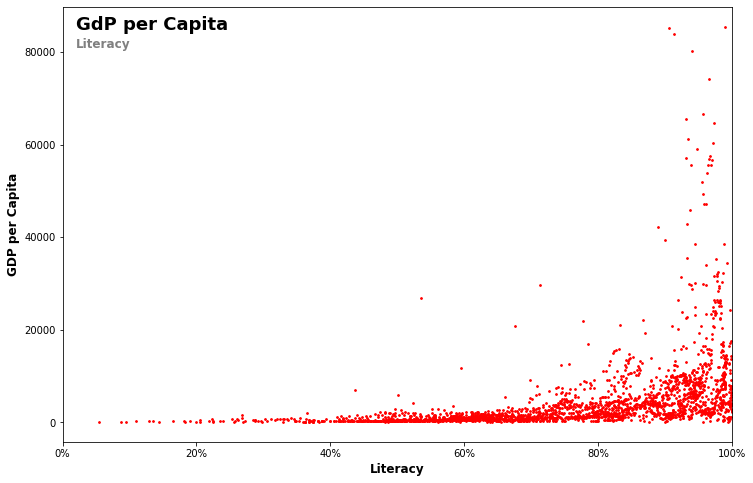

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Literacy",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
ax.set_xlim([0,100])

plt.scatter(df['literacy'],df['gdpPerCap'], color='red', s=3)
plt.figtext(0.14, 0.84, "GdP per Capita", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Literacy", fontsize=12, color='grey',fontweight='bold')

custom_ticks = [0,1,2,3,4,5]
#ax.set_yticks(custom_ticks,minor=True)

#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

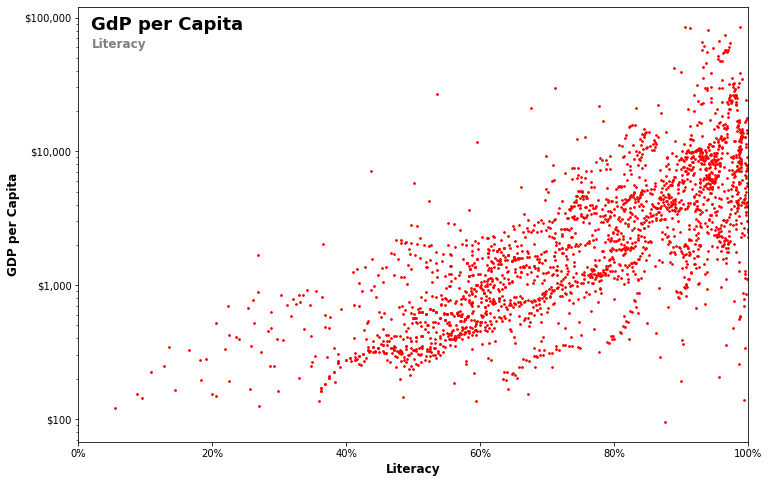

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_yscale('log')
ax.set_xlabel("Literacy",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
ax.set_xlim([0,100])

plt.scatter(df['literacy'],df['gdpPerCap'], color='red', s=3)
plt.figtext(0.14, 0.84, "GdP per Capita", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Literacy", fontsize=12, color='grey',fontweight='bold')

fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

In [11]:
# regression line
df['GDPlog'] = np.log10(df['gdpPerCap'])
df1 = df.dropna()

x = df1['literacy'].values
y = df1['GDPlog'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
model = LinearRegression().fit(x,y)

x_line = np.linspace(0, 100, 100)
#x_line = np.log10(x_line)
x_line = x_line.reshape(len(x_line), 1)

x_line
line_y = model.predict(x_line)

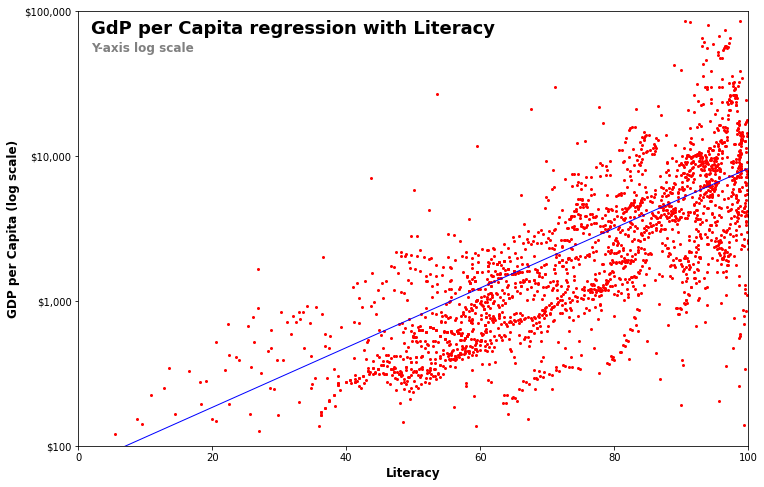

In [12]:
# with regression line
from math import log10
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Literacy",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita (log scale)",color="black",fontsize=12, fontweight='bold')

ax.set_xlim([0,100])

fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)

ymin, ymax = ax.get_ylim()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = np.linspace(ymin,ymax, 4)

custom_ticks = [0,1,2,3,4,5]

ax.set_yticks(custom_ticks,minor=True)

ax.plot(x_line, line_y, color="blue", linewidth=1)
plt.scatter(df['literacy'],df['GDPlog'], color='red', s=4)
plt.figtext(0.14, 0.84, "GdP per Capita regression with Literacy", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Y-axis log scale", fontsize=12, color='grey',fontweight='bold')

ax.set_yticks(custom_ticks,major=True)
ax.set_ylim([log10(100),log10(100000)])
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()